## Visibilities for a point source

In [1]:
%load_ext autoreload
import sys, os
sys.path.insert(0,"/astro/u/chenzhi/imcurio")
sys.path.insert(0,"../")
import numpy as np
import imcurio as imc
import matplotlib.pyplot as plt
from copy import deepcopy
import time

In [2]:
%autoreload
B = imc.SimBox("/astro/u/chenzhi/imcurio/sims/HImesh_0512_z100.fits")
T=imc.TelSim()

Box size: 32.81-20.88 deg from z=0.72-1.33


In [3]:
## Let's put a source with unit flux at offset_x and offfset_y in degress
theta = 0.02
phi = 0.5
offset_x_rad = np.sin(theta)*np.cos(phi) 
offset_y_rad = np.sin(theta)*np.sin(phi) 
offset_xi = np.rint(offset_x_rad/B.Dpix_rad).astype(int)
offset_yi = np.rint(offset_y_rad/B.Dpix_rad).astype(int)

## now put this source in
B.box *= 0.0 ## set all pixels to zero




In [199]:
%autoreload
Bs = deepcopy(B)
Bs.box[offset_xi,offset_yi,np.arange(B.Nz)]=1  ##except our point source
T=imc.TelSim()
#visPS = T.get_visibilities(Bs, None, vopts={'interpolation':'lasz'})
visPSlin = T.get_visibilities(Bs, None, vopts={'interpolation':'lin'})

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 


In [242]:
%autoreload
Sc = imc.SourceCat(np.array([[theta,phi,1.]]))
visDI = T.get_visibilities(B, Sc, vopts={'interpolation':'lin'})

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 


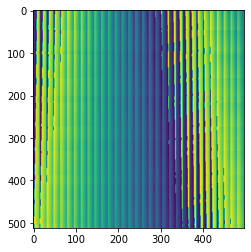

In [245]:
#plt.plot(visPS[:,10])
#plt.plot(visPSlin[:,10]*55,'b--')
#plt.plot(visDI[:,10])
plt.imshow(np.angle(visPSlin))

In [190]:
%autoreload
Sc = imc.SourceCat('../sims/GLEAM_EGC_v2_trim.fits')
T=imc.TelSim()
visDI = T.get_visibilities(B, Sc, vopts={'interpolation':'lin'})

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 


KeyboardInterrupt: 

In [1]:
plt.figure(figsize=(10,10))
#plt.plot(np.real(visPS[:,10]))
#plt.plot(np.real(visPSlin[:,10]))
plt.plot(np.real(visDI[:, 300]))

NameError: name 'plt' is not defined

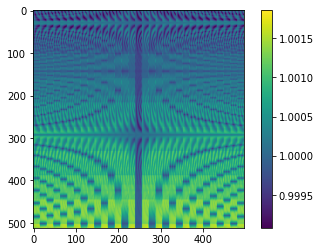

In [31]:
plt.imshow(np.real(visPS/visPSlin))
plt.colorbar()

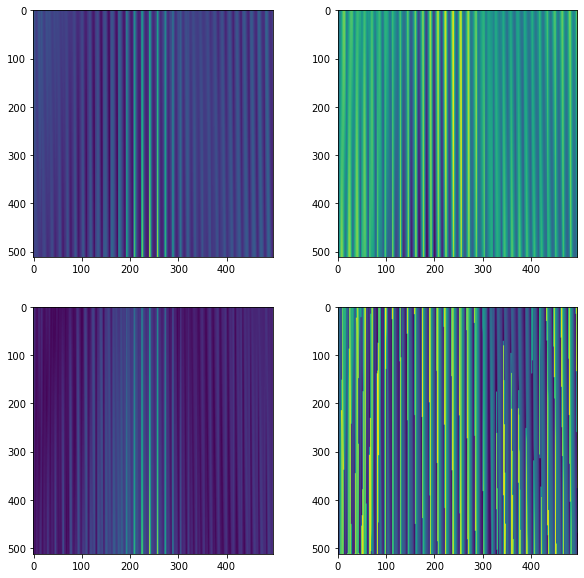

In [90]:
plt.figure(figsize=(10,10))
#plt.subplot(1,2,1)
#plt.imshow(np.abs(visPS))
plt.subplot(2,2,1)
plt.imshow(np.real(visDI))
plt.subplot(2,2,2)
plt.imshow(np.imag(visDI))
plt.subplot(2,2,3)
plt.imshow(np.abs(visDI))
plt.subplot(2,2,4)
plt.imshow(np.angle(visDI))

In [4]:
%autoreload
#GLEAM covers 30 declination south
start = time.time()
high = 2.  #upper limit in theta in deg
Sc_2 = imc.SourceCat('/astro/u/chenzhi/imcurio/sims/GLEAM_EGC_v2_trim.fits', limit =high)
visDI_2 = T.get_visibilities(B, Sc_2, vopts={'interpolation':'lin'})
end = time.time()
print(end-start)


Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 


KeyboardInterrupt: 

In [163]:
%autoreload
#GLEAM covers 30 declination south, so zenith ~ -30, need -50< x <-10 convert theta
start = time.time()
high = 5
Sc_5 = imc.SourceCat('/astro/u/chenzhi/imcurio/sims/GLEAM_EGC_v2_trim.fits', limit = high)
visDI_5 = T.get_visibilities(B, Sc_5, vopts={'interpolation':'lin'})
end = time.time()
print(end-start)

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 
105.43706822395325


<IPython.core.display.Javascript object>


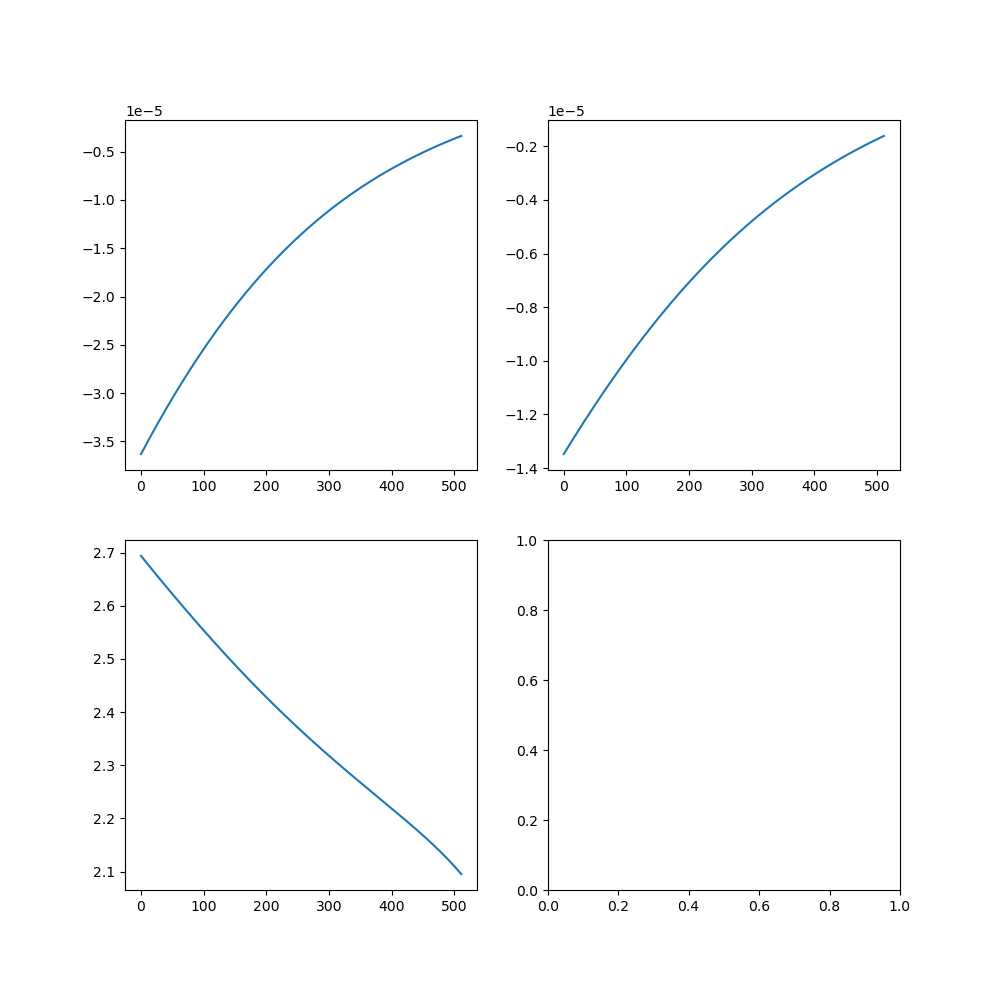

In [202]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
#plt.imshow(np.real(visDI_10[:,:]))
#plt.colorbar()
plt.plot(np.real(visDI_10[:,300]))   # Upper limit to 10deg should be sufficient.

plt.subplot(2,2,2)
#plt.imshow(np.real(visDI_10_a[:,:]))
#plt.colorbar()
plt.plot(np.real(visDI_10_a[:,300]))

plt.subplot(2,2,3)
#plt.imshow(np.real(visDI_10_a)/np.real(visDI_10))
plt.plot(np.real(visDI_10[:,300])/np.real(visDI_10_a[:,300]))

plt.subplot(2,2,4)
#plt.plot(np.real(visDI_2[:,30])/np.real(visDI_5[:,30]))
#plt.colorbar()

In [167]:
%autoreload
start = time.time()
high = 10.  
Sc_10 = imc.SourceCat('/astro/u/chenzhi/imcurio/sims/GLEAM_EGC_v2_trim.fits', limit = high)
visDI_10 = T.get_visibilities(B, Sc_10, vopts={'interpolation':'lin'})
end = time.time()
print(end-start)

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 
296.8022093772888


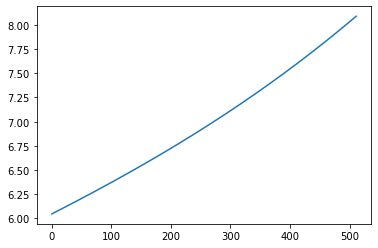

In [121]:
#plt.imshow(np.angle(visDI_15))
plt.plot(np.real(visDI_15[:,200]))

In [178]:
%autoreload
start = time.time()
high = 15.
Sc_15 = imc.SourceCat('/astro/u/chenzhi/imcurio/sims/GLEAM_EGC_v2_trim.fits', limit =high)
visDI_15 = T.get_visibilities(B, Sc_15, vopts={'interpolation':'lin'})
end = time.time()
print(end-start)

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 
613.4073593616486


In [191]:
%autoreload
start = time.time()
high = 10.  
Sc_10_a = imc.SourceCat('/astro/u/chenzhi/imcurio/sims/GLEAM_EGC_v2_trim.fits', limit = high)
visDI_10_a = T.get_visibilities(B, Sc_10_a, vopts={'interpolation':'lin'})
end = time.time()
print(end-start)

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 
348.04279017448425


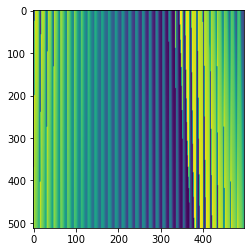

In [288]:
plt.imshow(np.angle(visDI_new_2))

In [5]:
%autoreload
start = time.time()
high = 2.
Sc = imc.SourceCat('/astro/u/chenzhi/imcurio/sims/GLEAM_EGC_v2_trim.fits', limit = high)
Sc_a = imc.SourceCat('/astro/u/chenzhi/imcurio/sims/GLEAM_EGC_v2_trim.fits')
end = time.time()
print(end-start)

1.3840184211730957


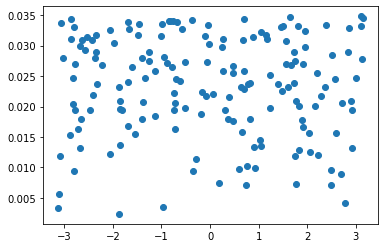

In [6]:
plt.scatter(Sc.theta_phi_flux[:,1],Sc.theta_phi_flux[:,0])

In [30]:
%load_ext autoreload
import numpy as np
import sys
sys.path.insert(0,'/astro/u/chenzhi/imcurio')
import imcurio as imc
import matplotlib.pyplot as plt
import fitsio
fileA = fitsio.read('/astro/u/chenzhi/imcurio/sims/GLEAM_EGC_v2_trim.fits', columns= ['RA','DEC','FLUX'])
fileG = np.array(fileA.tolist())
fileG[:,0] *= np.pi/180.
fileG[:,1] = (90. - fileG[:,1]) *np.pi/180.
fileG[:,[0,1,2]] = fileG[:,[1,0,2]]   # in theta, phi flux order
cond2 = np.where(fileG[:,1] > np.pi)
fileG[cond2,1] = fileG[cond2,1] - 2*np.pi
cond1 = np.where((fileG[:,0] > (118.*np.pi/180.)) & (fileG[:,0] < (122.*np.pi/180.)))  #between some theta
file = fileG[cond1] 
cond3 = np.where((file[:,1] < (1.5*np.pi/180.)) & (file[:,1] > (-1.5*np.pi/180.)))   #for small phi
file = file[cond3]

print(file.shape)
fileG.shape

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(139, 3)


(245453, 3)

<IPython.core.display.Javascript object>


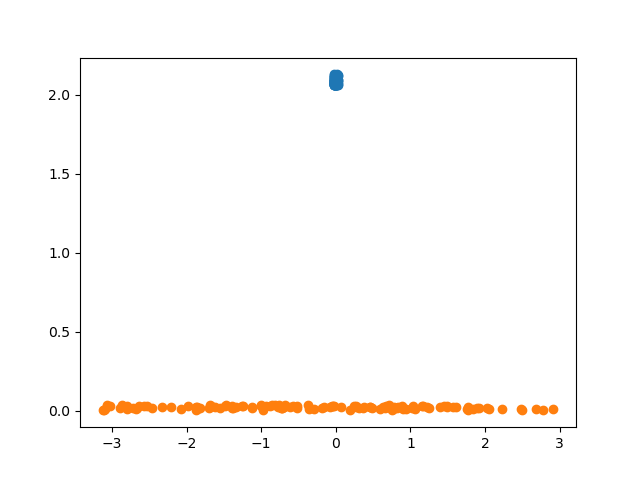

In [31]:
plt.scatter(file[:,1],file[:,0])

In [32]:
cond_same = np.where(np.in1d(file[:,2],Sc.theta_phi_flux[:,2])) #Test whether Sc contains majority of points
Sc_inclusive = Sc.theta_phi_flux[cond_same]
#file.shape == Sc_inclusive.shape
plt.scatter(Sc_inclusive[:,1],Sc_inclusive[:,0])  #plot same points of file for Sc

In [33]:
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)



In [34]:
theta = file[:,0]     # For total unrotated data
phi = file[:,1]
#r = np.ones(file[:,1].shape)

xx = sin(phi)*cos(theta)
yy = sin(phi)*sin(theta)
zz = cos(phi)


In [35]:
theta_p = Sc_inclusive[:,0]   #rotated data for the same points
phi_p = Sc_inclusive[:,1]
#r_p = np.ones(Sc_a.theta_phi_flux[:,1].shape)
xx_p = sin(phi_p)*cos(theta_p)
yy_p = sin(phi_p)*sin(theta_p)
zz_p = cos(phi_p)

In [27]:
%matplotlib

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


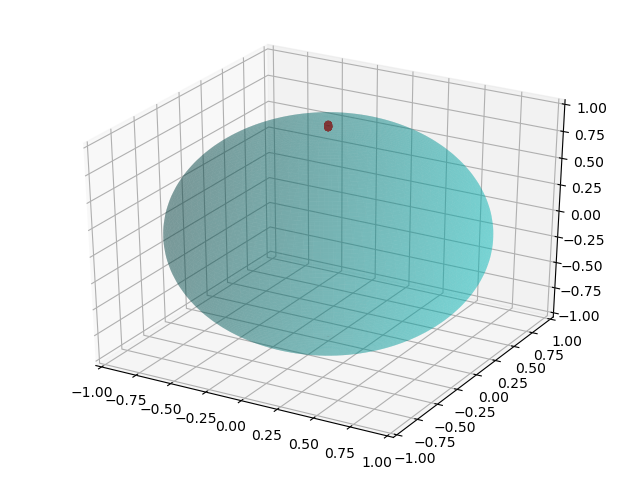

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

ax.scatter(xx,yy,zz,color="r",s=20)

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


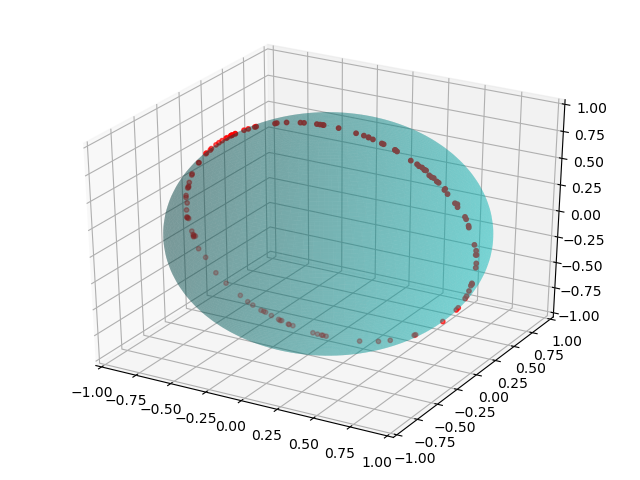

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

ax.scatter(xx_p,yy_p,zz_p,color="r",s=10)

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
plt.tight_layout()
plt.show()